In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [2]:
X,y = load_diabetes(return_X_y = True)
df = pd.DataFrame(X)

# Feature Scaling
X = X - X.mean() / X_Range

In [3]:
# Feature Scaling
# print((X[:,0] - X[:,0].mean())/(X[:,0].max() - X[:,0].min()))
X_mean = df[:].mean().values.reshape(1,10)
X_new = X - X_mean
df = pd.DataFrame(X_new)
X_max = df[:].max()
X_min = df[:].min()
X_range = (X_max - X_min).values
X_new = X_new/X_range.reshape(1,10)
X = X_new
# print(X_new[:,0])

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
import matplotlib.pyplot as plt

In [6]:
class GDRegressor:
    def __init__(self,epochs=100,lr=0.001):
        self.epochs = epochs
        self.lr = lr
        self.coef_ = None
        self.intercept_ = None
    def fit(self,X_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        x_axis = []
        costs = []
        for _ in range(self.epochs):
            y_pred = np.dot(X_train,self.coef_) + self.intercept_
            intercept_der = np.mean(y_pred - y_train)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            coef_der = np.dot(X_train.T,(y_pred - y_train)) / X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
            cost = np.dot((y_pred - y_train).T, (y_pred-y_train)) / (2 * X_train.shape[0])
            x_axis.append(_)
            costs.append(cost)
        plt.plot(x_axis,costs)
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

0.44279020396098645

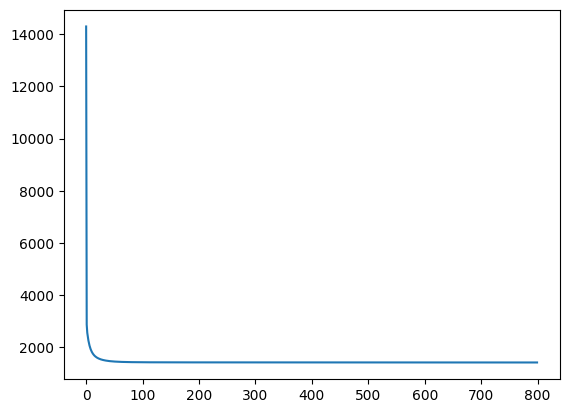

In [7]:
gdr = GDRegressor(epochs = 800, lr = 0.9)
gdr.fit(X_train,y_train)
y_pred = gdr.predict(X_test)
r2_score(y_test,y_pred)